## Simple Classification Task

##### Import Required Modules

In [2]:
# 
%matplotlib
%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('refereneces/Files_all/Files/home/jovyan/work/readonly/fruit_data_with_colors.txt')

Using matplotlib backend: <object object at 0x7ffb7cef2be0>


In [3]:
# look into dataframe
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# look entire table
print(fruits) 

# shape of table
print(fruits.shape)

    fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      apple          braeburn   172  

In [5]:
print(fruits.fruit_label.unique())
print(fruits.fruit_name.unique())

lookup_fruite_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
print(lookup_fruite_name)

[1 2 3 4]
['apple' 'mandarin' 'orange' 'lemon']
{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


##### Create training and testing set

In [6]:
X = fruits[['mass','width','height','color_score']]  # features set
y = fruits[['fruit_label']]   # target output set

In [7]:
# devide the data into training and testing parts. 75% data will be in training data and 25% data will be in testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# look into all the function shape
print("Original Data shape => {}".format(fruits.shape))
print("input feature X shape => {}".format(X.shape))
print("output target variable y shape =>".format(y.shape))
print("Model training data X_train => {}".format(X_train.shape))
print("Model training output target y_train => {}".format(y_train.shape))
print("Model testing data X_test => {}".format(X_test.shape))
print("Model testing output target y_test => {}".format(y_test.shape))

Original Data shape => (59, 7)
input feature X shape => (59, 4)
output target variable y shape =>
Model training data X_train => (44, 4)
Model training output target y_train => (44, 1)
Model testing data X_test => (15, 4)
Model testing output target y_test => (15, 1)


In real world database require data preprocessing to fit the machine learning model. Those techniques are studying in data science field. 

##### looking ruf idea of data

We use 2D and 3D plotes to eximine the data

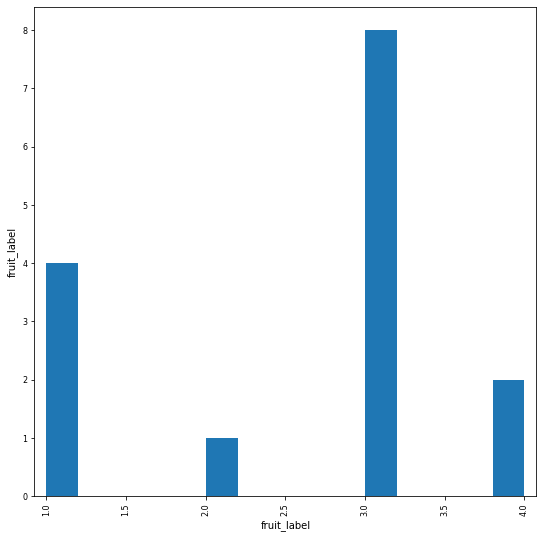

In [8]:
# plotting the scatter matrix
from matplotlib import cm

# we have X_train, X_test, y_train, y_test

# what is histogram
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(y_test, marker='o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)


In [9]:
print(y_test)

    fruit_label
26            3
35            3
43            4
28            3
11            1
2             1
34            3
46            4
40            3
22            1
4             2
10            1
30            3
41            3
33            3


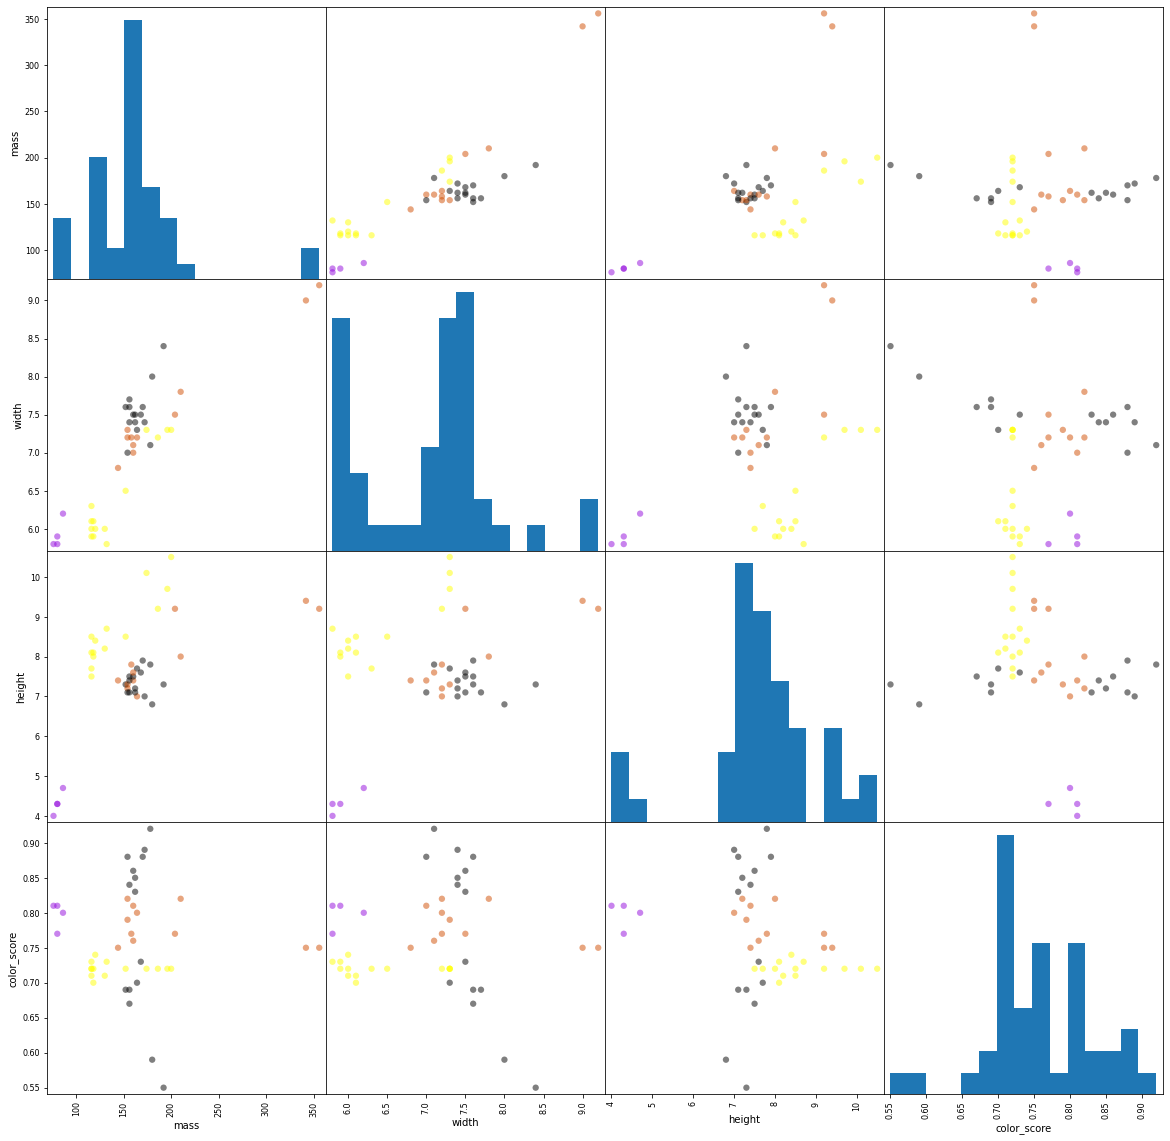

In [10]:
# plotting the scatter matrix
from matplotlib import cm

# we have X_train, X_test, y_train, y_test

# plotting different graph for featues inter relation.
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train,c=y_train.fruit_label, marker='o', s=40, hist_kwds={'bins':15}, figsize=(20,20), cmap=cmap)


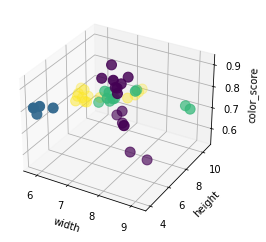

In [11]:
#Plotting 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'],X_train['height'], X_train['color_score'], c=y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create Model - K nearest neightber

##### Create classifier Object

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

##### Train the classifier

In [13]:
knn.fit(X_train,y_train)

/home/savan/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [14]:
knn.score(X_test, y_test)

0.5333333333333333

In [15]:
fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.85]])
print(lookup_fruite_name[fruit_prediction[0]])
print(fruit_prediction)

mandarin
[2]


/home/savan/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
